# Supplementary Notebook: Figures

Allen Mi - January 2022

In [1]:
from discopy import Ty, Word, CircuitFunctor, qubit
from discopy.grammar import draw
from discopy.quantum import Ket
from pytket.extensions.qiskit import tk_to_qiskit
import numpy as np

import ansaetze as a
import utils as u

In [2]:
s, n = Ty('s'), Ty('n')
Alice = Word('Alice', n)
loves = Word('loves', n.r @ s @ n.l)
hates = Word('hates', n.r @ s @ n.l)
Bob =  Word('Bob', n)
who = Word('who', n.r @ n @ s.l @ n)

vocab = [Alice, loves, hates, Bob, who]

In [3]:
sentences, parsing = u.load('corpora/corpus.pickle')

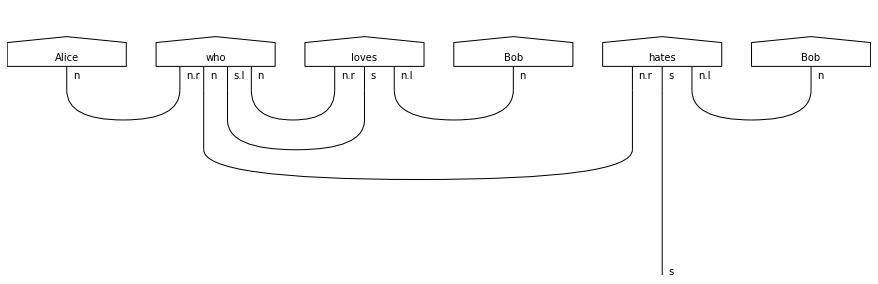

In [4]:
draw(
    parsing['Alice who loves Bob hates Bob.'], draw_type_labels=True, figsize=(12, 4),
#     path='figures/relative-clause.pdf'
)

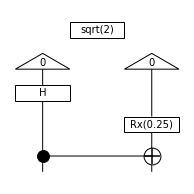

In [5]:
a.transitive_ansatz(0.25).draw(
    aspect='auto', draw_type_labels=False, figsize=(2.5, 2.5),
#     path='figures/ansatz-verb-discopy.pdf'
)

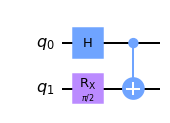

In [6]:
tk_to_qiskit(a.transitive_ansatz(0.25).to_tk()).draw(
    'mpl',
#     filename='figures/ansatz-verb-qiskit.pdf'
)

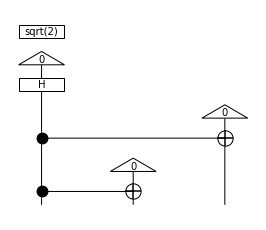

In [7]:
a.GHZ.draw(
    aspect='auto', draw_type_labels=False,  figsize=(3.5, 3),
#     path='figures/ansatz-GHZ-discopy.pdf'
)

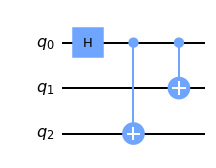

In [8]:
tk_to_qiskit(a.GHZ.to_tk()).draw(
    'mpl',
#     filename='figures/ansatz-GHZ-qiskit.pdf'
)

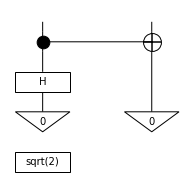

In [9]:
a.cup.draw(
    aspect='auto', draw_type_labels=False, figsize=(2.5, 2.5),
#     path='figures/ansatz-cup-discopy.pdf'
)

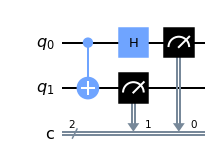

In [10]:
tk_to_qiskit(a.cup.to_tk()).draw(
    'mpl',
#     filename='figures/ansatz-cup-qiskit.pdf'
)

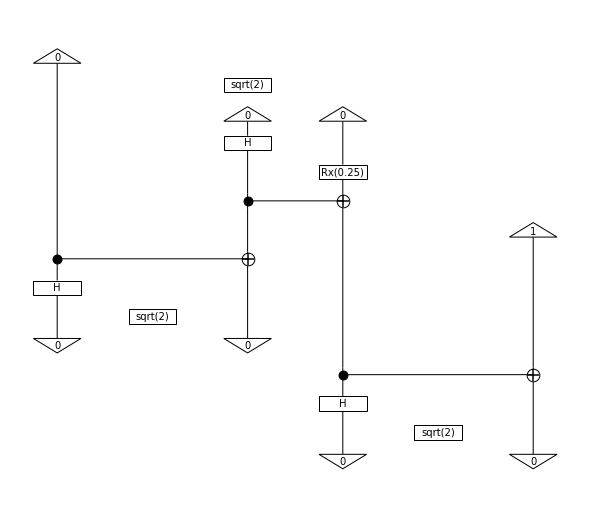

In [11]:
F = lambda params: CircuitFunctor(
    ob={s: qubit ** 0, n: qubit ** 1},
    ar={
        Alice: Ket(0),
        loves: a.transitive_ansatz(params[0]),
        hates: a.transitive_ansatz(params[1]),
        Bob: Ket(1),
        who: a.GHZ
    }
)

params0 = np.array([0.25, 0.75])
circuit = F(params0)(parsing['Alice loves Bob.'])

circuit.draw(
    figsize=(8, 7), aspect='auto', draw_type_labels=False,
#     path='figures/circ-short-discopy.pdf'
)

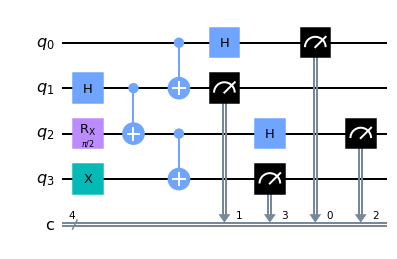

In [12]:
tk_to_qiskit(circuit.to_tk()).draw(
    'mpl',
#     filename='figures/circ-short-qiskit.pdf'
)

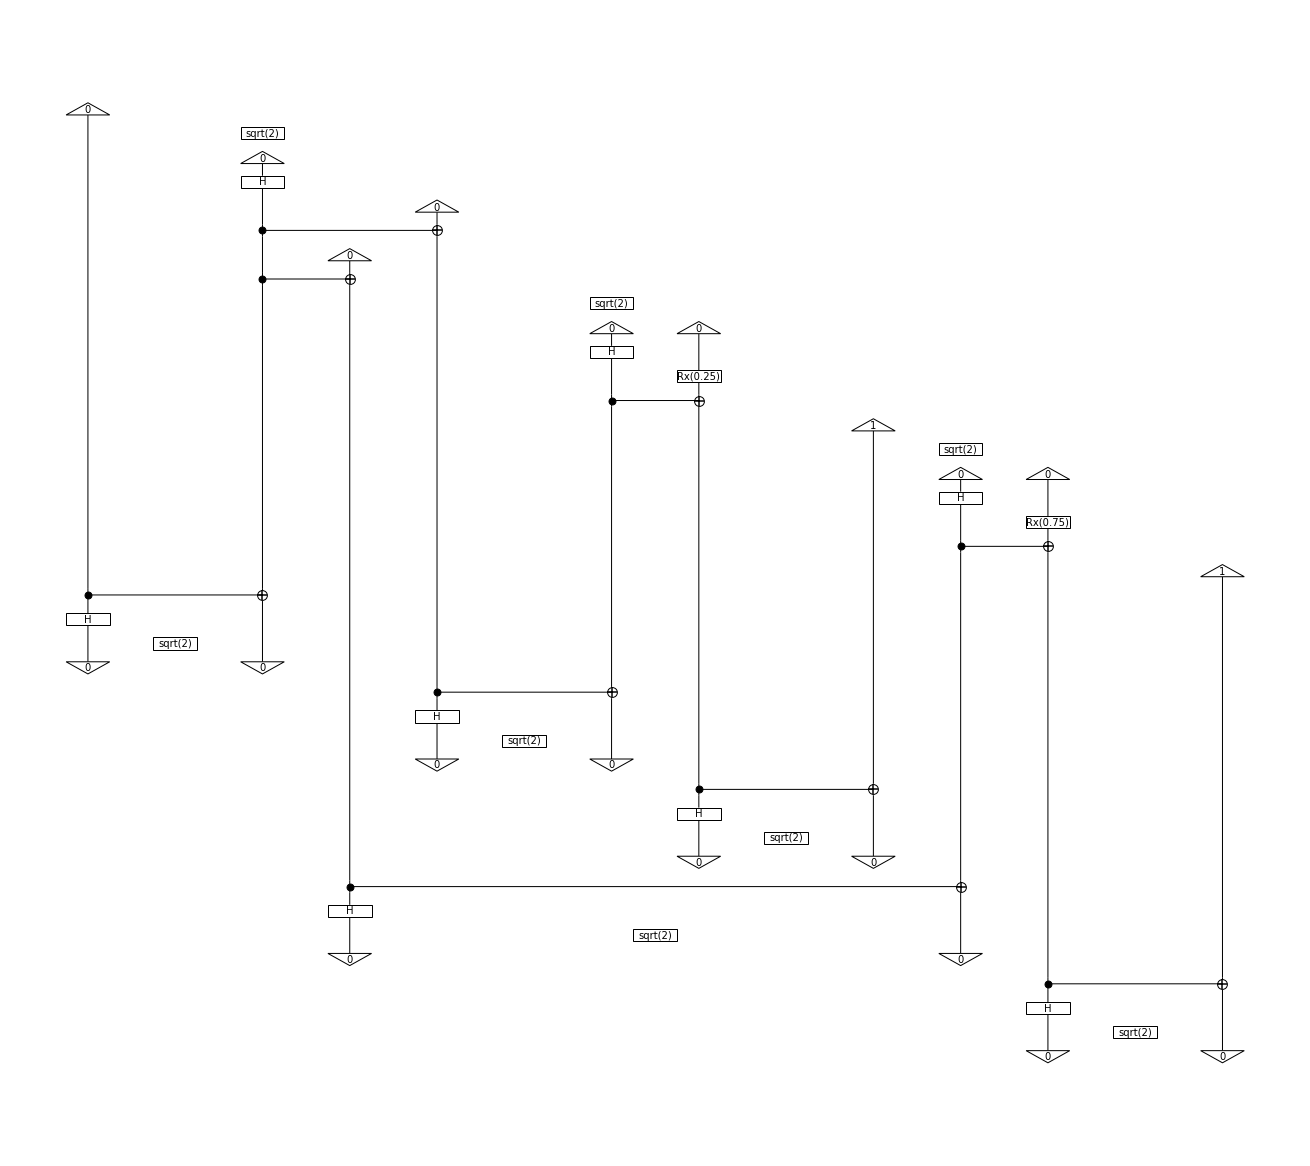

In [13]:
circuit = F(params0)(parsing['Alice who loves Bob hates Bob.'])

circuit.draw(
    figsize=(18, 16), aspect='auto', draw_type_labels=False,
#     path='figures/circ-long-discopy.pdf'
)

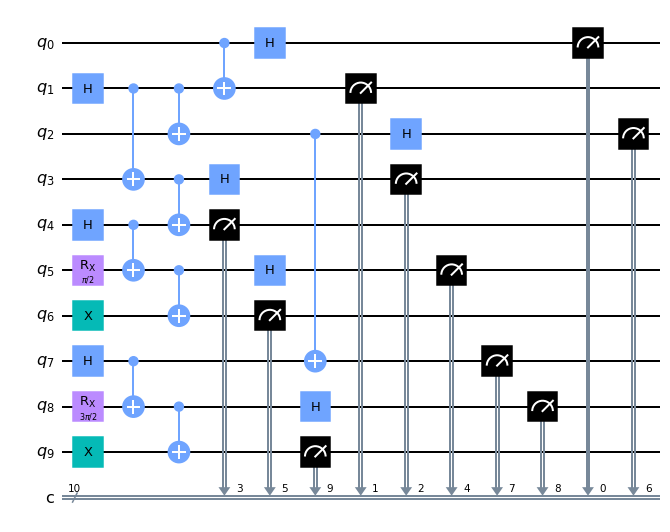

In [14]:
tk_to_qiskit(circuit.to_tk()).draw(
    'mpl',
#     filename='figures/circ-long-qiskit.pdf'
)